# OCR Pipeline

We show how to convert a book interactively from pages into tsv and inspect intermediate results.
This involves performing OCR with Kraken.
Here we do the Fusus Al Hikam, Afifi edition.

See the documentation of the class [Book](https://among.github.io/fusus/book.html).

There is also a command line interface for running the pipeline, see
[convert](https://among.github.io/fusus/fusus/convert.html).

In [1]:
%load_ext autoreload
%autoreload 2
!cd `pwd`

In [2]:
from fusus.book import Book

Initialize the pipeline for processing the pages in this directory.

In [3]:
B = Book(cd="~/github/among/fusus/ur/Afifi")

Pre-process some pages, to see whether layout and lines are detected properly.
We do not do OCR yet, and we preserve intermediate results.

In [4]:
page = B.process(pages="52-58", doOcr=False, batch=False)

  0.00s Batch of 7 pages: 52-58
  0.00s Start batch processing images
   |     5.00s     1 052.tif                                 
   |     4.77s     2 053.tif                                 
   |     4.88s     3 054.tif                                 
   |     4.83s     4 055.tif                                 
   |     4.65s     5 056.tif                                 
   |     4.64s     6 057.tif                                 
   |     4.40s     7 058.tif                                 
    33s all done


We can now go to the directory *inter* and look at all histogram images.

Alternatively, we can inspect one here, e.g. page 57.

* has the layout been detected correctly?
* do we see the proper line boundaries?

In [5]:
def peek(pageNum):
    page = B.process(pages=pageNum, doOcr=False, batch=False, uptoLayout=True)
    page.show(stage="histogram")
    return page

  0.00s Batch of 1 pages: 57
  0.00s Start batch processing images
   |      |      |     0.00s     1 057.tif                                 
  3.92s all done


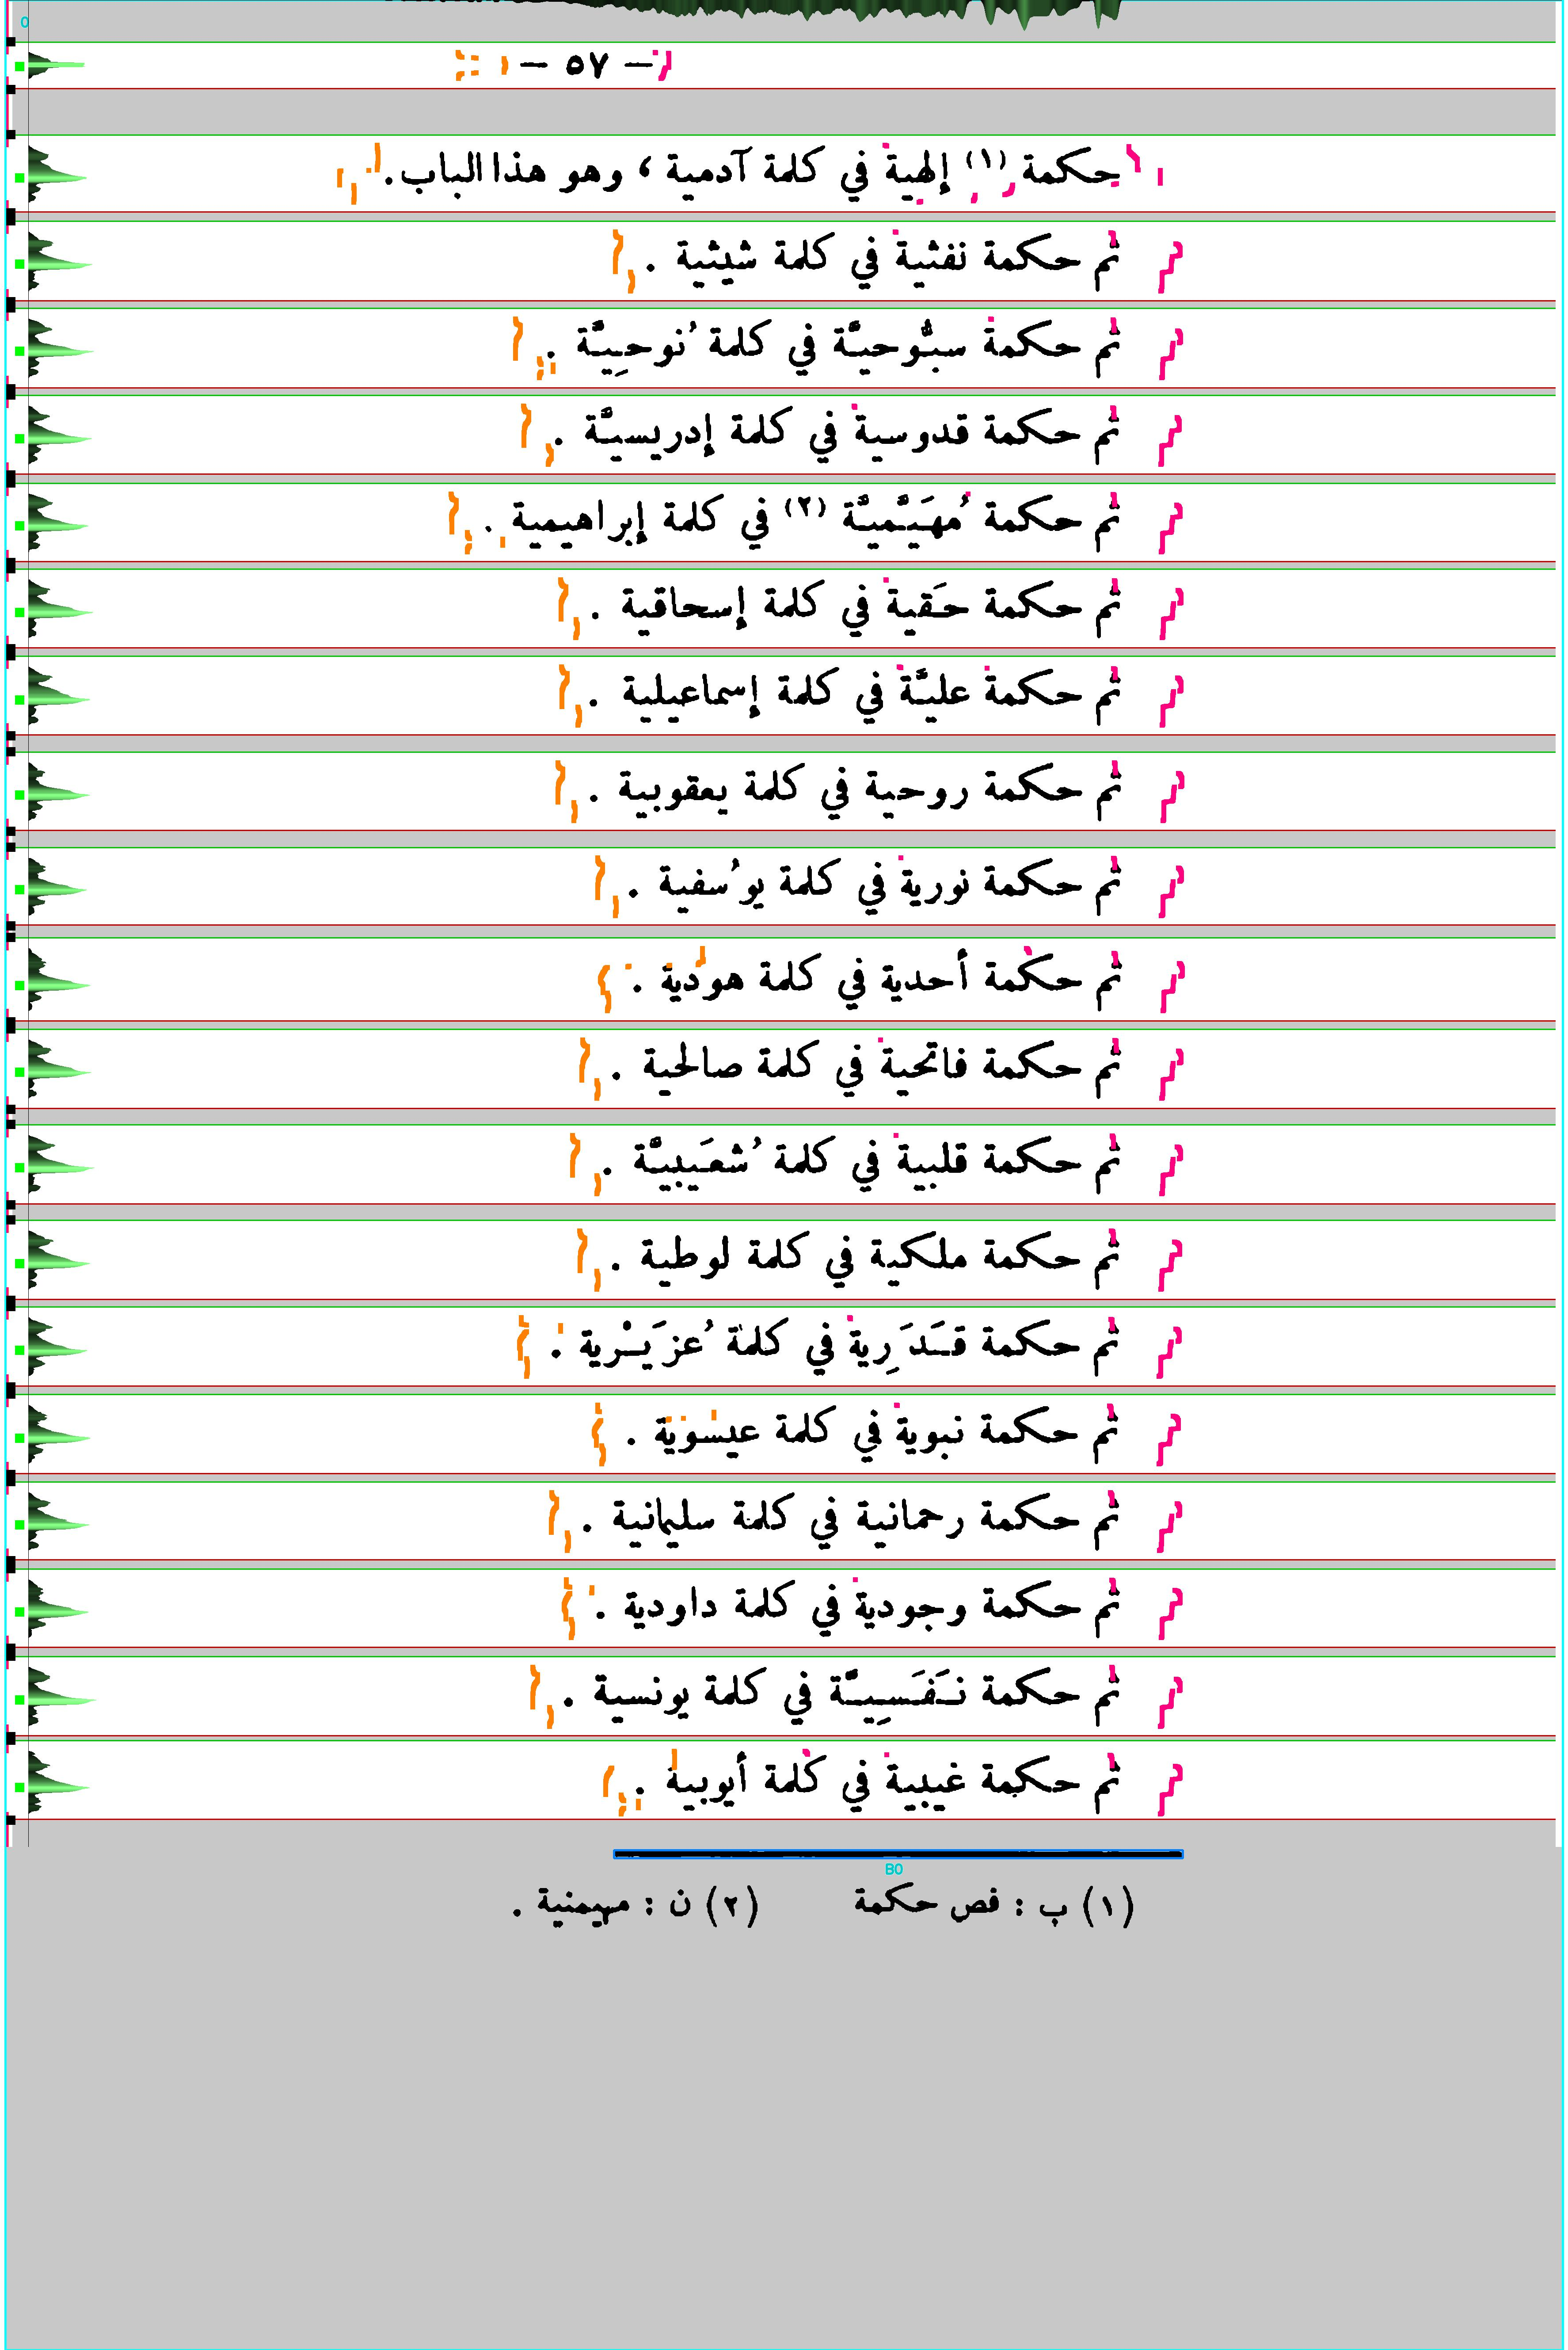

In [6]:
page = peek(57)

With the *page* object in hand, we can do more inspections.

Here is the original and a normalized version.

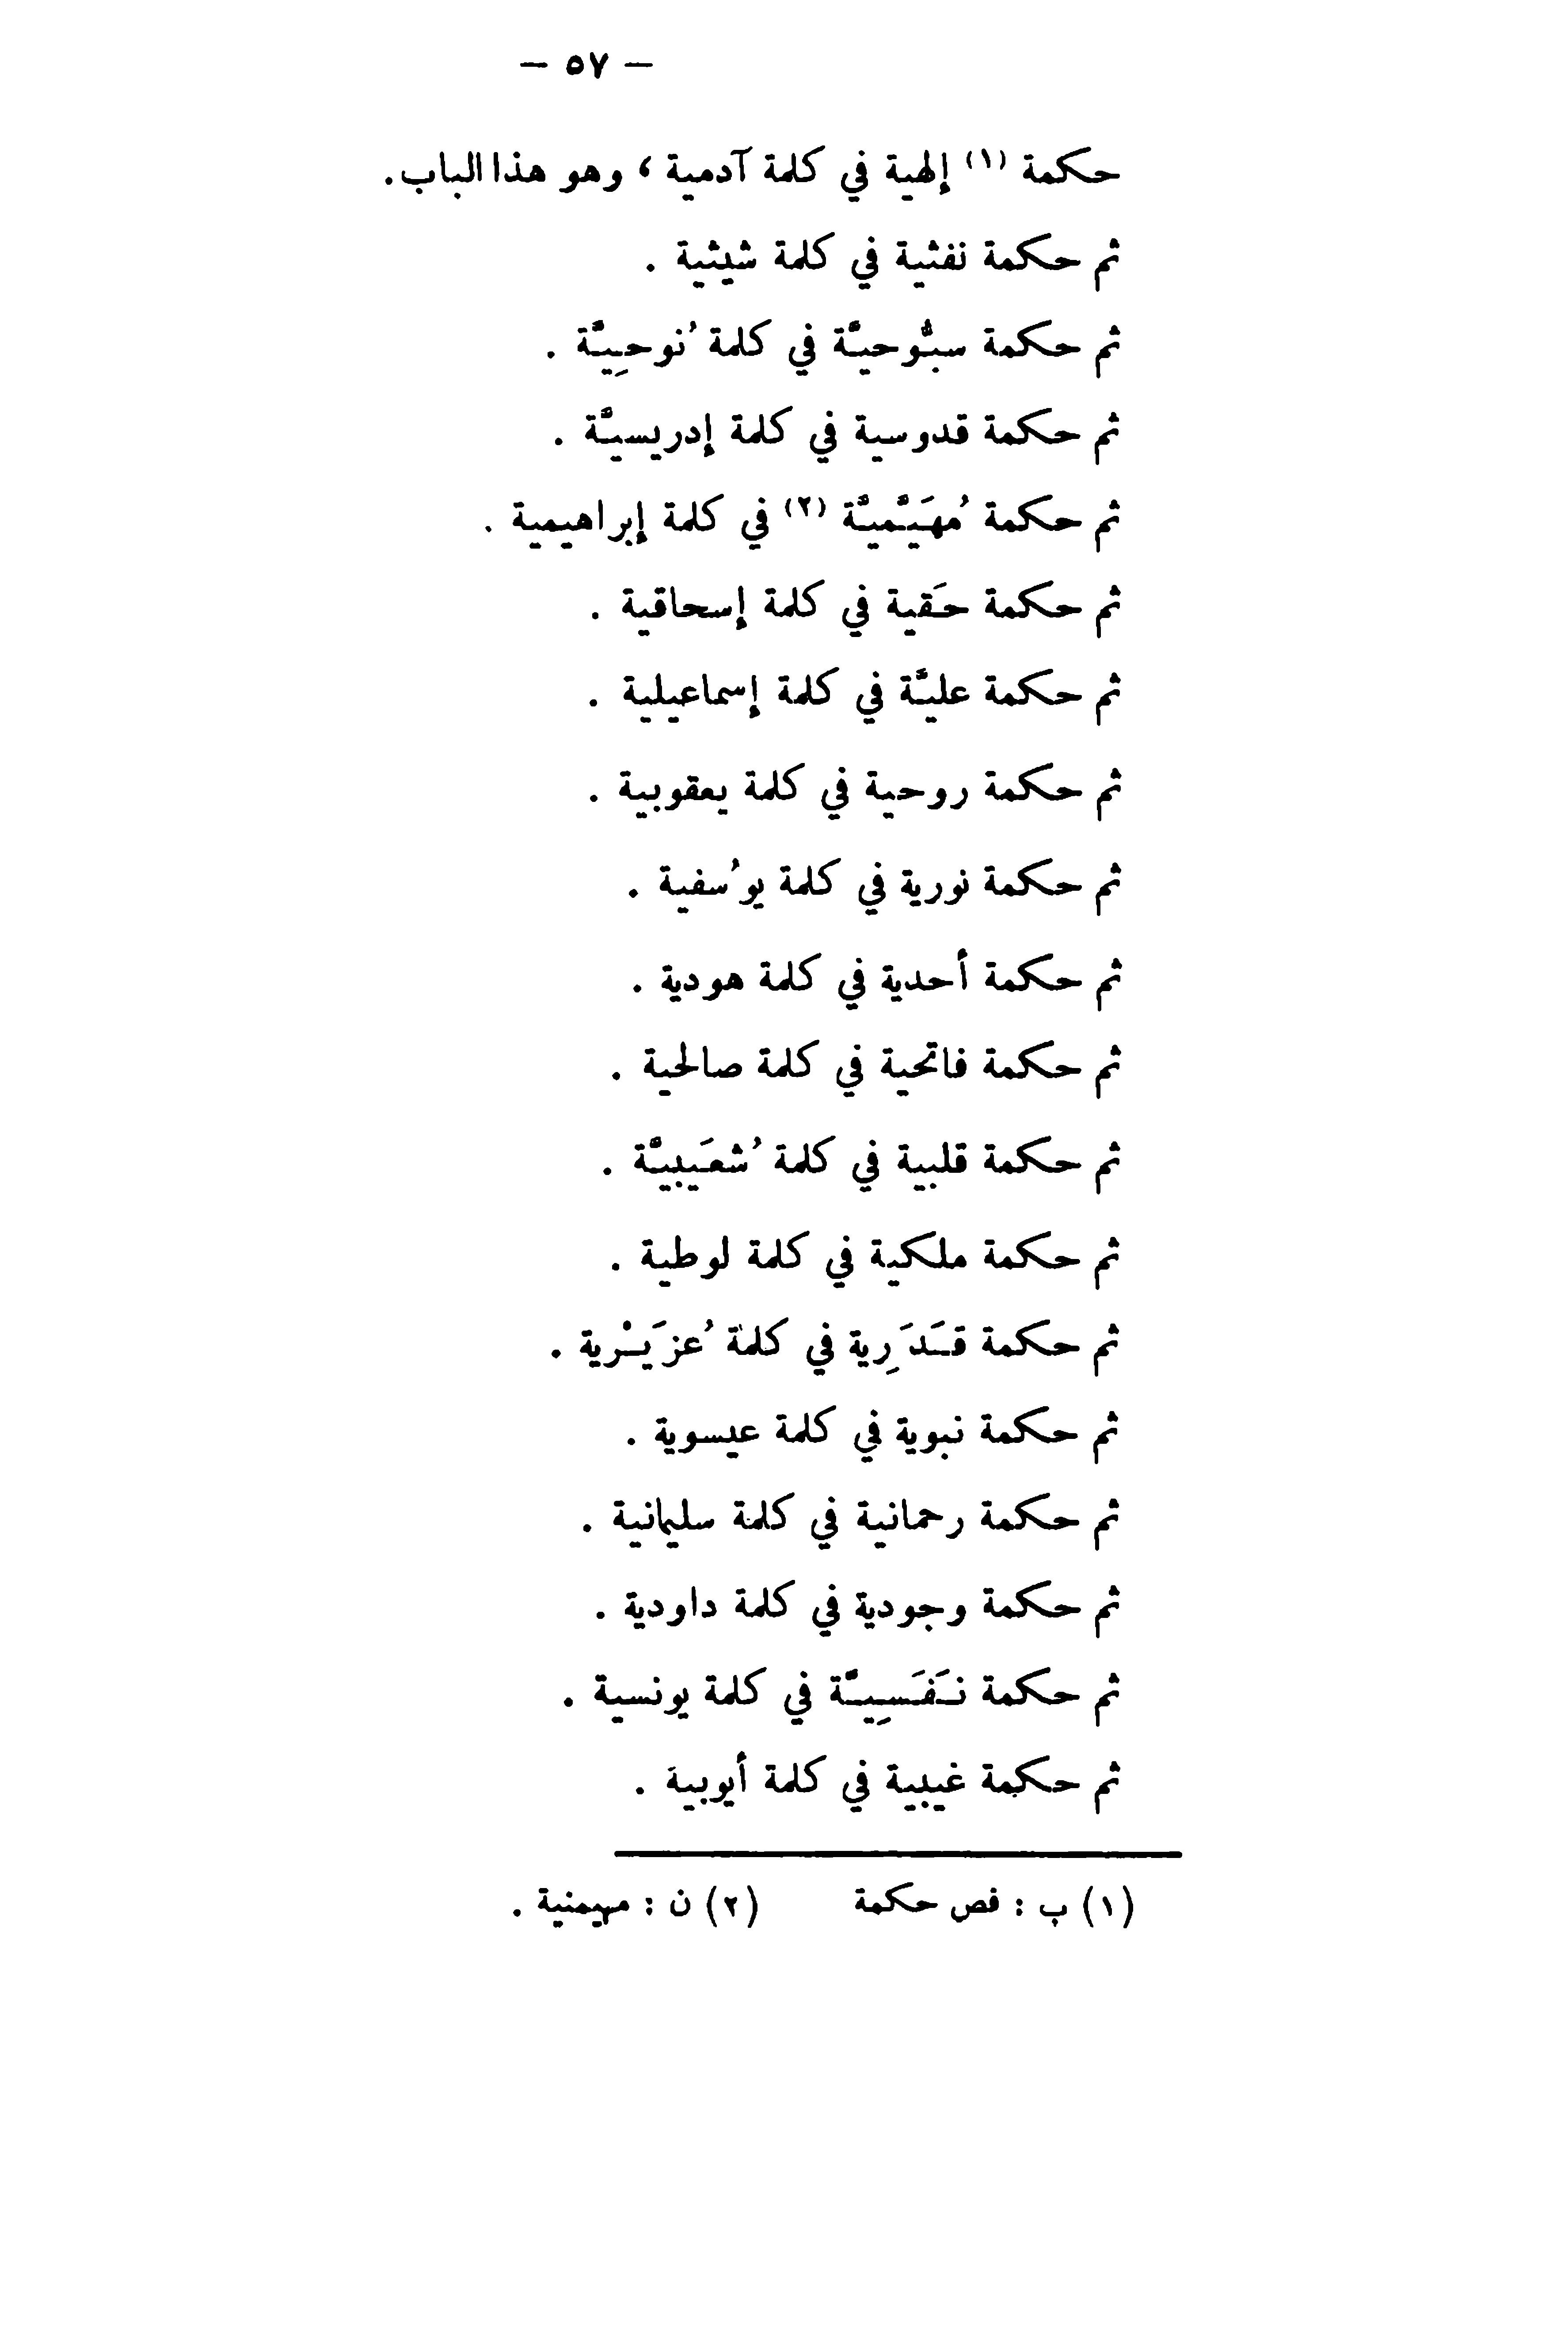

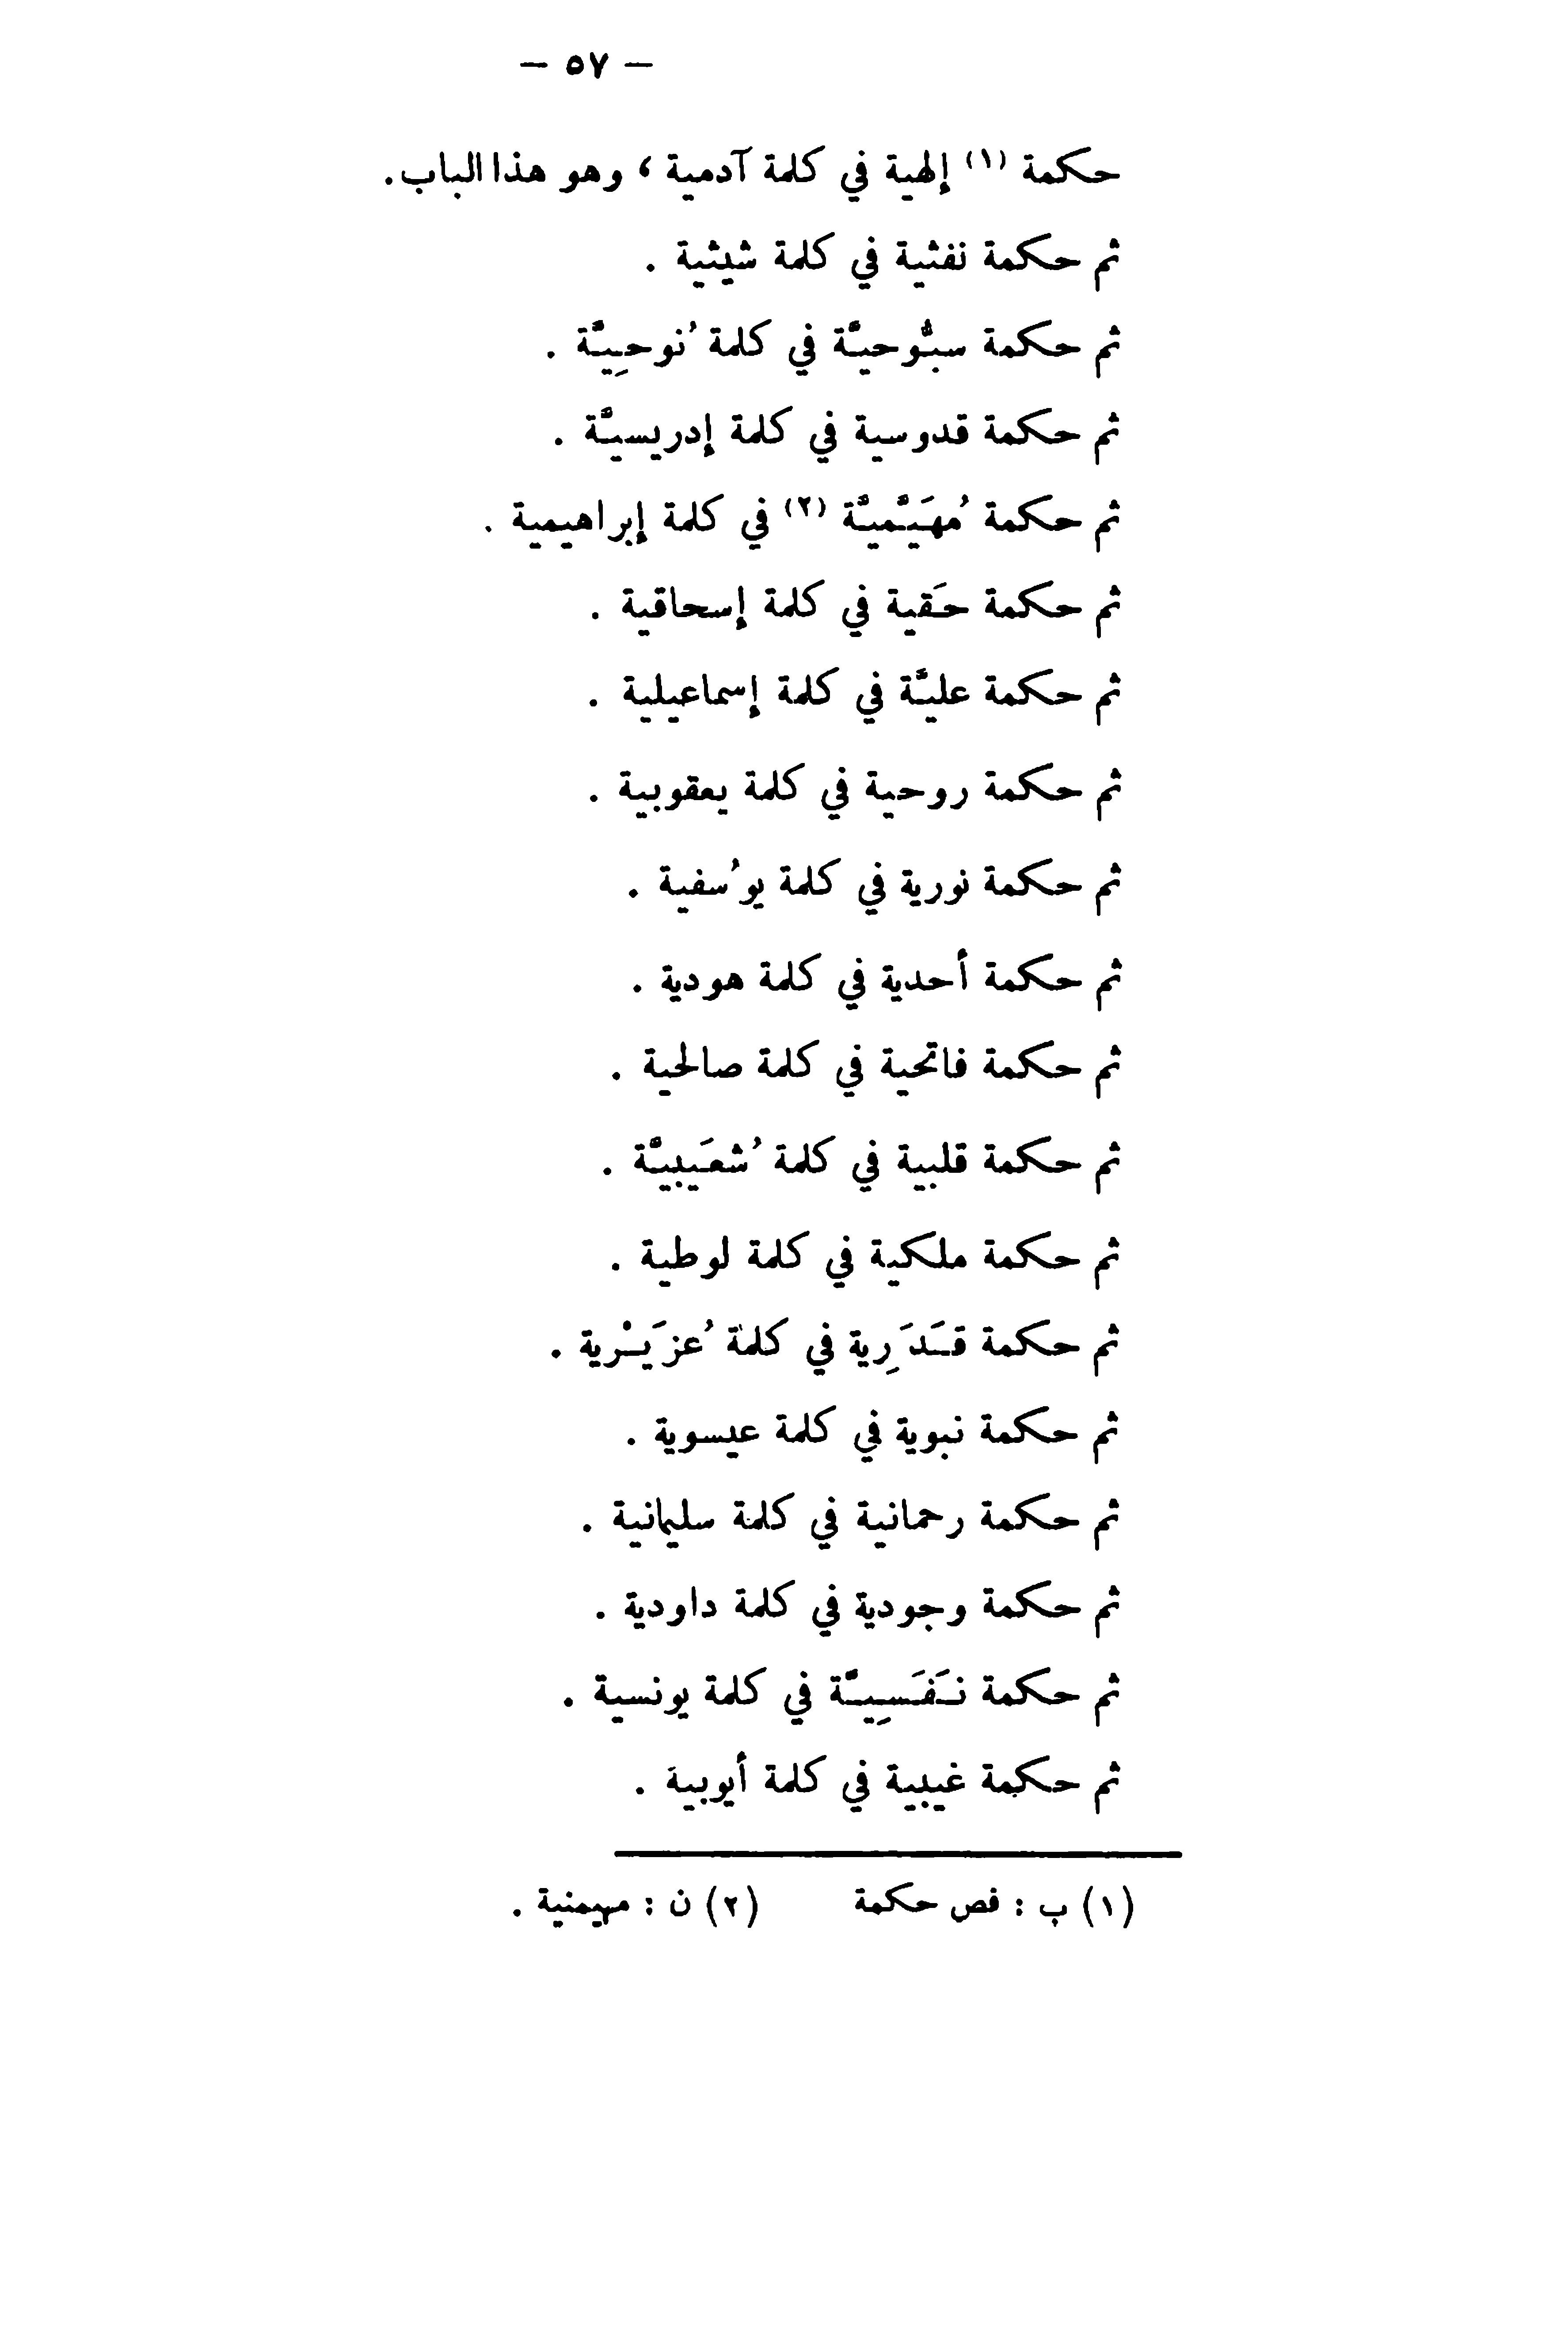

In [7]:
page.show(stage="orig,normalized")

Now we process these pages completely, including OCR, in batch mode.

In [8]:
page = B.process(pages="52-58", doOcr=True, batch=True)

  0.00s Batch of 7 pages: 52-58
  0.00s Start batch processing images
   |     1.59s Loading for Kraken: ~/github/among/fusus/model/arabic_generalized.mlmodel
   |     9.07s model loaded
   |       21s     1 052.tif                                 
   |       14s     2 053.tif                                 
   |       13s     3 054.tif                                 
   |       13s     4 055.tif                                 
   |       13s     5 056.tif                                 
   |     7.48s     6 057.tif                                 
   |     9.27s     7 058.tif                                 
 1m 31s all done


In [9]:
B.measureQuality(pages="52-58")

 4m 44s Batch of 7 pages: 52-58
 4m 44s Start measuring ocr quality of these images
   |     0.01s word-confidences of OCR results for 7 pages   


item,# of words,min,max,average,notes
overall,1575,22,100,96,
p052,256,22,100,95,
p053,276,74,100,96,
p054,234,60,100,96,
p055,252,60,100,95,
p056,242,70,100,96,
p057,141,77,100,96,
p058,174,55,100,96,


   |     0.01s char-confidences of OCR results for 7 pages


item,# of chars,min,max,average,notes
overall,7673,22,100,96,
p052,1306,22,100,96,
p053,1377,45,100,96,
p054,1221,37,100,96,
p055,1213,35,100,96,
p056,1150,41,100,96,
p057,615,50,100,96,
p058,791,40,100,96,


   |     0.01s by-char-confidences of OCR results for 57 characters


 4m 44s all done


In [5]:
B.htmlPages(pages="52-58")

    53s Batch of 7 pages: 52-58
    53s Start producing plain text of these pages
    53s written to html/52-58.html                           


If the OCR for all the pages has already been executed, you can get the plain HTML text from the TSV pages
by simply this:

In [6]:
B.htmlPages()

    56s Batch of 180 pages: 47-226
    56s Start producing plain text of these pages
    56s written to html/47-226.html                          
